# Clustering Data for Visualization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

## Preparations

### Load Data

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scale Data

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


## Plot Clustered Data
Since the sklearn.manifold implementation runs very slowly, we use [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).

In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [6]:
def plot_tsne(X, y, title='t-SNE'):
    
    tsne = TSNE(n_components=2, random_state=seed).fit_transform(X)
    
    fig = plt.figure(figsize=(12, 12))
    plt.scatter(tsne[:, 0], tsne[:, 1], cmap='coolwarm', c=(y==0), label='Normal', linewidth=2)
    plt.scatter(tsne[:, 0], tsne[:, 1], cmap='coolwarm', c=(y==1), label='Fraud', linewidth=2)
    plt.title(title, fontsize=14)
    plt.show()

### With normal Data

In [7]:
# Separate fraudulent and normal transactions
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

# Sample a sub set of the normal transactions
df_normal_sub = df_normal.sample(2000)

# Merge fraud cases and the normal cases subsample
df_sub = pd.concat([df_fraud, df_normal_sub]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

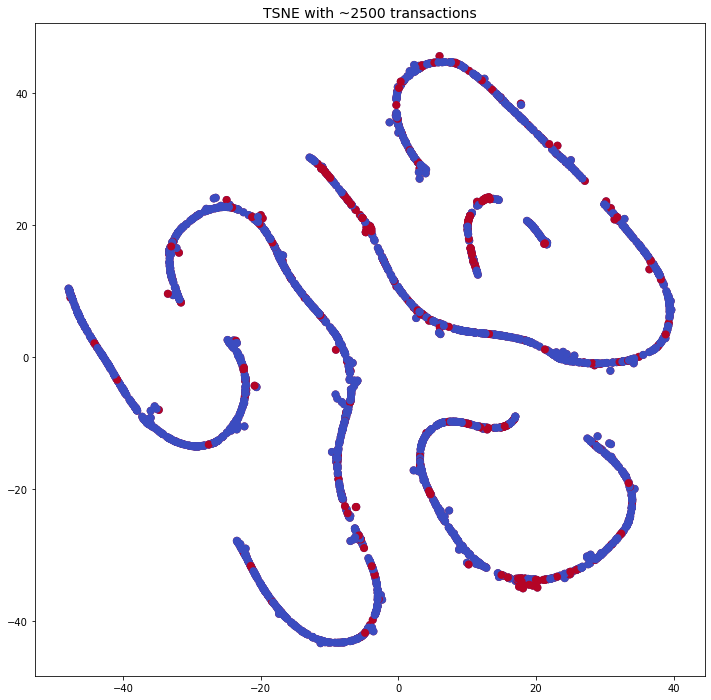

In [8]:
plot_tsne(X_sub, y_sub, 'TSNE with ~2500 transactions')

### With Scaled Data

In [9]:
# Separate fraudulent and normal transactions
df_fraud = df_scaled[df_scaled['Class'] == 1]
df_normal = df_scaled[df_scaled['Class'] == 0]

# Sample a sub set of the normal transactions
df_normal_sub = df_normal.sample(2000)

# Merge fraud cases and the normal cases subsample
df_sub = pd.concat([df_fraud, df_normal_sub]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

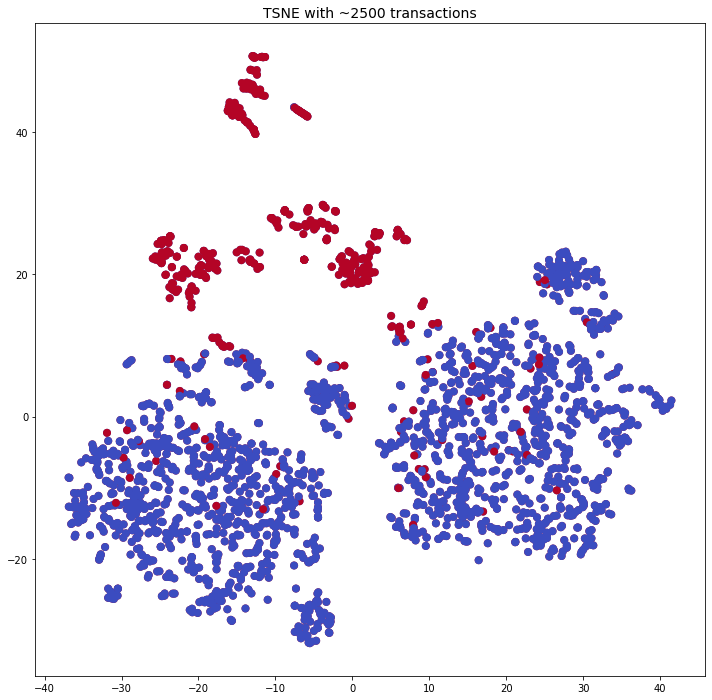

In [10]:
plot_tsne(X_sub, y_sub, 'TSNE with ~2500 transactions')